<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #7: Clasificación y Agrupación
`Fecha de entrega: Octubre 24, 2020. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB  #Ingenuo bayeciano
from sklearn.svm import LinearSVC  #Maquina vecto de soporte

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [2]:
# Cargar datos
path = 'reviews_vidjew_es.csv'
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


# Parte 1: Clasificación

### `[6 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [ ]:
#Comentarios y criticas quedan sobre los productos online

In [4]:
train, test = train_test_split(data, test_size=0.2, random_state=28)
#train, test 
print(f"El conjunto de datos de entrenamiento tiene {train.shape[0]} registros")
print(f"El conjunto de datos de prueba tiene {test.shape[0]} registros")

El conjunto de datos de entrenamiento tiene 800 registros
El conjunto de datos de prueba tiene 200 registros


###  `[6 pts]` Punto 2: Hacer pre-procesamiento del texto

In [5]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
#tfidf_vect


In [8]:
X_train = tfidf_vect.fit_transform(train.review_body.values)
#X_train
y_train = train.product_category.values
#y_train

X_test = tfidf_vect.transform(test.review_body.values)
#X_test 
y_test = test.product_category.values
#y_test 


###  `[6 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, u otro.

In [9]:
#Modelo de clasificacion Regresion Logistica
logreg = LogisticRegression(class_weight='balanced') #Es para que ajuste las clases sean balanceadas
#logreg

logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [10]:
nb = MultinomialNB()
svm = LinearSVC(class_weight='balanced')

In [11]:
# Entrenamos los modelos
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train);

###  `[6 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [12]:
# Hacemos las predicciones para los datos de prueba (test)
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)

#Exactitud:
print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}")
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}")

Naive Bayes:            0.84
Regresión Logística:    0.86
SVM:                    0.84


In [13]:
#Precision y Sensibilidad
metricas = [precision_score, recall_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"Naive Bayes: {metrica(y_test, y_pred_nb, pos_label='video_games'):>15.2f}")
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, pos_label='video_games'):>7.2f}")
    print(f"SVM: {metrica(y_test, y_pred_svm, pos_label='video_games'):>23.2f}")
    print()

precision_score
Naive Bayes:            0.88
Regresión Logística:    0.86
SVM:                    0.86

recall_score
Naive Bayes:            0.78
Regresión Logística:    0.84
SVM:                    0.79



###  `[BONUS: 3 pts]` Matriz de confusión

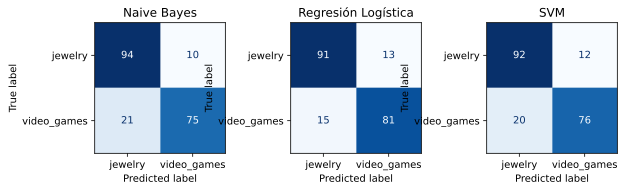

In [14]:
%config InlineBackend.figure_format = 'svg'
 
fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(1,3,1)
plot_confusion_matrix(nb, X_test, y_test, cmap = 'Blues', ax=ax1).im_.colorbar.remove()
plt.title("Naive Bayes")

ax2 = fig.add_subplot(1,3,2)
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues', ax=ax2).im_.colorbar.remove()
plt.title("Regresión Logística")


ax3 = fig.add_subplot(1,3,3)
plot_confusion_matrix(svm, X_test, y_test, cmap = 'Blues', ax=ax3).im_.colorbar.remove() # normalize='true'
plt.title("SVM");



###  `[BONUS: 1 pts]` Términos más importantes de cada categoría

# Parte 2: Agrupación

###  `[6 pts]` Punto 1: Hacer pre-procesamiento del texto

In [16]:
path = 'reviews_vidjew_es.csv'
data1 = pd.read_csv(path)
data1.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


In [18]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect_agru = TfidfVectorizer(preprocessor=pre_procesado)
tfidf_agru = tfidf_vect_agru.fit_transform(data1.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf_agru.toarray(), columns=tfidf_vect_agru.get_feature_names())
#tfidf_matrix

###  `[6 pts]` Punto 2: Método del codo para determinar $K$

Calculando para k=1
Calculando para k=2
Calculando para k=3
Calculando para k=4
Calculando para k=5
Calculando para k=6
Calculando para k=7
Calculando para k=8
Calculando para k=9
Calculando para k=10
Calculando para k=11
Calculando para k=12
Calculando para k=13
Calculando para k=14
Calculando para k=15
Calculando para k=16
Calculando para k=17


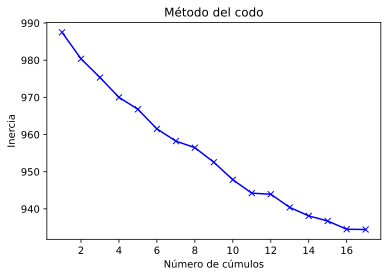

In [19]:
ks = []
k_inertia = []

for k in range(1,18):
    print(f"Calculando para k={k}")
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    ks.append(k)
    k_inertia.append(kmeans.inertia_)
    
plt.xlabel('Número de cúmulos')
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.plot(ks, k_inertia, 'bx-')

###  `[6 pts]` Punto 3: Entrenar modelo con el $K$ escogido

In [47]:
k = 9
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

KMeans(n_clusters=9)

In [48]:
len(tfidf_vect.vocabulary_)

3250

In [49]:
len (model.cluster_centers_[0])

3666

In [53]:
data['cluster'] = model.labels_
#data.head()

model.cluster_centers_

array([[-2.16840434e-19,  2.00924746e-02,  5.42101086e-20, ...,
         1.08420217e-19,  3.28721151e-03,  0.00000000e+00],
       [-2.16840434e-19,  4.33680869e-19,  5.42101086e-20, ...,
         1.08420217e-19,  4.33680869e-19,  5.33408723e-03],
       [ 5.61808356e-04, -1.51788304e-18,  1.08420217e-19, ...,
         6.52569858e-04,  2.03322543e-03,  2.64189972e-03],
       ...,
       [-3.25260652e-19,  6.84077822e-03,  5.42101086e-20, ...,
         5.42101086e-20,  4.33680869e-19,  0.00000000e+00],
       [ 4.26153784e-03,  2.16840434e-19,  1.08420217e-19, ...,
         5.42101086e-20,  4.47709026e-03,  0.00000000e+00],
       [-4.33680869e-19,  6.50521303e-19,  1.08420217e-19, ...,
         1.08420217e-19,  4.62508460e-03,  4.33680869e-19]])

In [54]:
k = 9
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)
nbrs = NearestNeighbors(n_neighbors=4, metric="euclidean").fit(tfidf_matrix.values)

In [55]:
data1['cluster'] = model.labels_
clust_cnt = data1['cluster'].value_counts()
clust_cnt_pct = data1['cluster'].value_counts(normalize=True)
 
centroides = model.cluster_centers_
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect_agru.get_feature_names()

 
print(f"CLUSTERS:\n")
for i in range(k):
    print(f"Cluster #{i}")
    print(f"{clust_cnt[i]} textos ({clust_cnt_pct[i]:.2%} de los datos)")
    print(f"TERMINOS: ", end=" ")
    for idx in order_centroids[i, :15]:
        print(f"{terms[idx]}", end=" ")
    print("\n")
    print(f"Textos Representativos")
    for texto in data1.iloc[nbrs.kneighbors([centroides[i]])[1][0]]['review_body'].values:
        print(f"* {texto}")
    print("\n")
   


CLUSTERS:

Cluster #0
440 textos (44.00% de los datos)
TERMINOS:  si precio mando día mas puede regalo solo producto bonita caja buen cumple artículo bastante 

Textos Representativos
* Esta conjunto de pendientes y collar sorprende por su bajo precio. Aun no tengo datos para valorar su calidad, porque lo he recibido anteayer pero en principio tiene buen aspecto. Lo que ya no me parece tan bueno es el embalaje utilizado. Un artículo tan delicado como este no puede ir en un simples sobre de burbujas con tan poco recubrimiento. El resultado es, como se puede apreciar en la fotos, los vástagos de los pendientes vienen todos doblados (compré tres unidades). Sería interesante que utilizaran una caja para ello. Ahora toca el proceso de enderezado que, espero que soporten. De todas maneras por lo que cuestan tampoco se les puede pedir más.
* El juego en sí es increíble. A estas alturas de la generación poco más se puede decir salvo que es el simulador de conducción por excelencia, el mejor en

###  `[BONUS: 3 pts]` Visualización usando PCA

In [58]:
clusters = {0:'Joyas',
            1:'Joyas',
            2:'Joyas',
            3:'Joyas',
            4:'Juego',
            5:'Joyas',
            6:'Joyas',
            7:'Joyas',
            8:'Juego'}
        
#clusters = {0:'Joyas',
 #           1:'Joyas',
  #          2:'Joyas',
   #         3:'Joyas',
    #        4:'Joyas',
     #       5:'Juego'}
     
data1['cluster_name'] = data1['cluster'].apply(lambda val: clusters[val])
data1['texto_peq'] = data1['review_body'].apply(lambda texto: texto[:100])

data1

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster,cluster_name,texto_peq
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry,5,Joyas,"Buen. Buena calidad, y buena presentación."
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games,3,Joyas,"Un producto a perfecto, para salir de casa con..."
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games,0,Joyas,No funciona con Nintendo Switch. No hay forma ...
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games,7,Joyas,"Recomendado, los utilizo para pc y no me dan n..."
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games,7,Joyas,El cable funciona bien podria ser un poco mas ...
...,...,...,...,...,...,...,...,...,...,...,...
995,es_0427672,product_es_0899883,reviewer_es_0474735,2,En la foto parece que la cadena sea más gruesa...,Cadena muy fina,es,jewelry,2,Joyas,En la foto parece que la cadena sea más gruesa...
996,es_0059540,product_es_0702564,reviewer_es_0754753,3,"Bien por su precio, la cadena demasiado fina.",E,es,jewelry,7,Joyas,"Bien por su precio, la cadena demasiado fina."
997,es_0303349,product_es_0678671,reviewer_es_0172313,5,Muy bien!! Ahora tengo organizados los pendien...,Bonito,es,jewelry,7,Joyas,Muy bien!! Ahora tengo organizados los pendien...
998,es_0659961,product_es_0294943,reviewer_es_0554554,4,"Las tapas para los joystics no están nada mal,...",No está mal pero sólo he probado las fundas.,es,video_games,0,Joyas,"Las tapas para los joystics no están nada mal,..."


In [59]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data1.cluster.values
result['texto'] = data1.texto_peq.values

 
trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['cluster'].values)) 

layout = go.Layout(title="PCA")


fig = go.Figure(data=trace, layout=layout)
iplot(fig)

# Parte 3: Comparación

### `[6 pts]` Punto 1: Hacer predicción para estas dos frases de los dos modelos

In [22]:
test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
nuevo_trans = tfidf_vect.transform(test)
clusters[model.predict(nuevo_trans)[0]]

# transformar con tfidf usado para clasificación
# transformar con tfidf usado para agrupación

# resultado para clasificación
# resultado para agrupación

['video_games' 'jewelry']
[1 2]


### `[2 pts]` Punto 2: Preguntas

- ¿A cuál modelo le fue mejor? 
- ¿Cuál modelo se demoró más en entrenar? 
- Según los resultados del $K$-Means, ¿cuál es la estructura latente de los datos?
- ¿Alguna otra observación?

In [ ]:
- ¿A cuál modelo le fue mejor? 
   El modelo fue el de Regresión Logística
- ¿Cuál modelo se demoró más en entrenar? 
   El de agrupación k-Means
- Según los resultados del $K$-Means, ¿cuál es la estructura latente de los datos?
  La mayoría de los datos son de referencias positivas de los productos comprados y enviados.
    El cluster 0 tiene el porcentaje alto, el cual los comentario son muy positivos.
- ¿Alguna otra observación?
   Es un poco complicado saber interpretar los resultados de los cluster.